<center><h1><b>5주차 ✅ 배달현황 데이터 전처리</b></h1></center>

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [90]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum - qq > /dev/null
        !fc-cache - fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


----
#### 배달현황 데이터 전처리

In [52]:
# 배달현황 데이터 가져오기 (19,20년도)
dly_raw = pd.read_csv('data/delivery/배달앱_및_배달대행_이용현황_20220610184750.csv', encoding='cp949')
dly_raw.head()

,특성별(1),특성별(2),특성별(3),특성별(4),배달앱및대행별(1),이용여부및비용별(1),이용여부및비용별(2),2019,2020
0,전체,소계,소계,소계,배달앱,이용여부 (%),예,11.2,19.9
1,전체,소계,소계,소계,배달앱,이용여부 (%),아니오,88.8,80.1
2,전체,소계,소계,소계,배달앱,월평균 비용,5만원 미만 (%),4.7,5.6
3,전체,소계,소계,소계,배달앱,월평균 비용,5만원~15만원 미만 (%),23.0,24.9
4,전체,소계,소계,소계,배달앱,월평균 비용,15만원~50만원 미만 (%),55.6,47.1


In [53]:
# 특성별(1) 고유값 확인하기
dly_raw['특성별(1)'].unique()

array(['전체', '업종별', '운영형태별', '지역별', '매출액규모별'], dtype=object)

In [54]:
# 필요한 지역 데이터만 뽑기
dly_raw = dly_raw[dly_raw['특성별(1)'] == '지역별']
dly_raw.head()

,특성별(1),특성별(2),특성별(3),특성별(4),배달앱및대행별(1),이용여부및비용별(1),이용여부및비용별(2),2019,2020
292,지역별,서울권,소계,소계,배달앱,이용여부 (%),예,9.7,19.9
293,지역별,서울권,소계,소계,배달앱,이용여부 (%),아니오,90.3,80.1
294,지역별,서울권,소계,소계,배달앱,월평균 비용,5만원 미만 (%),6.2,4.6
295,지역별,서울권,소계,소계,배달앱,월평균 비용,5만원~15만원 미만 (%),26.7,19.3
296,지역별,서울권,소계,소계,배달앱,월평균 비용,15만원~50만원 미만 (%),52.2,49.4


In [55]:
# 필요없는 컬럼 삭제하기
cols = ['특성별(2)', '이용여부및비용별(2)', '2019', '2020']
dly_raw = dly_raw[cols]
dly_raw.head()

,특성별(2),이용여부및비용별(2),2019,2020
292,서울권,예,9.7,19.9
293,서울권,아니오,90.3,80.1
294,서울권,5만원 미만 (%),6.2,4.6
295,서울권,5만원~15만원 미만 (%),26.7,19.3
296,서울권,15만원~50만원 미만 (%),52.2,49.4


In [56]:
# 컬럼명 변경하기
dly_raw = dly_raw.rename(columns={
    '특성별(2)':'권역명',
    '이용여부및비용별(2)':'분류',
})
dly_raw.head()

,권역명,분류,2019,2020
292,서울권,예,9.7,19.9
293,서울권,아니오,90.3,80.1
294,서울권,5만원 미만 (%),6.2,4.6
295,서울권,5만원~15만원 미만 (%),26.7,19.3
296,서울권,15만원~50만원 미만 (%),52.2,49.4


In [57]:
# 타입 확인 & 수치형으로 변경
dly_raw.dtypes

권역명      object
분류       object
2019     object
2020    float64
dtype: object

In [61]:
# 문자열 들어있는 데이터 찾기
dly_raw[dly_raw['2019'] == '-']

,권역명,분류,2019,2020
298,서울권,모름 (%),-,7.0
306,서울권,모름 (%),-,5.6
314,수도권,모름 (%),-,3.9
322,수도권,모름 (%),-,3.8
330,충청권,모름 (%),-,3.3
338,충청권,모름 (%),-,3.1
346,호남권,모름 (%),-,0.8
354,호남권,모름 (%),-,3.6
362,경남권,모름 (%),-,5.7
370,경남권,모름 (%),-,6.4


In [62]:
dly_raw['2019'] = pd.to_numeric(dly_raw['2019'], errors='coerce', downcast='float')
dly_raw.dtypes

권역명      object
분류       object
2019    float32
2020    float64
dtype: object

In [65]:
# 결측치 비율 확인
dly_raw.isnull().mean()

권역명     0.000000
분류      0.000000
2019    0.135417
2020    0.000000
dtype: float64

In [103]:
# 권역을 기준으로 그룹화하기
# 원래는 앞에 분류가 더 있었는데 그거 제거하고 그냥 평균치로 가져옴.
delivery = dly_raw.groupby(by=['권역명', '분류']).mean()
delivery.head(10)

2019       2020
권역명 분류                                        
경남권 15만원~50만원 미만 (%)      38.849998      35.30
    50만원 이상 (%)           25.000000      26.10
    5만원 미만 (%)             8.900000       5.00
    5만원~15만원 미만 (%)       27.299999      27.50
    모름 (%)                      NaN       6.05
    아니오                   84.000000      82.85
    예                     16.000000      17.15
    평균 (원)            407087.312500  634587.05
경북권 15만원~50만원 미만 (%)      60.550003      33.20
    50만원 이상 (%)           28.200001      24.50

In [79]:
# 배달현황 데이터 저장하기
delivery.to_csv('output/deliver_1920.csv',)

----
#### 배달현황 데이터 시각화

In [80]:
dly = pd.read_csv('output/deliver_1920.csv')
dly.head()

,권역명,분류,2019,2020
0,경남권,15만원~50만원 미만 (%),38.85,35.30
1,경남권,50만원 이상 (%),25.00,26.10
2,경남권,5만원 미만 (%),8.90,5.00
3,경남권,5만원~15만원 미만 (%),27.30,27.50
4,경남권,모름 (%),NaN,6.05


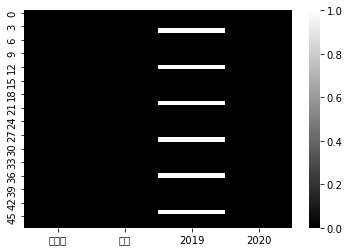

In [88]:
# 결측치 살펴보기
# 2019년 모름 데이터의 결측치가 들어가있음.
_ = sns.heatmap(dly.isnull(), cmap='gray')
plt.show()

In [96]:
# tidy data 만들기
dly_m = dly.melt(id_vars=['권역명', '분류'], value_name='비율', var_name='시점')
dly_m.head()

,권역명,분류,시점,비율
0,경남권,15만원~50만원 미만 (%),2019,38.85
1,경남권,50만원 이상 (%),2019,25.00
2,경남권,5만원 미만 (%),2019,8.90
3,경남권,5만원~15만원 미만 (%),2019,27.30
4,경남권,모름 (%),2019,NaN


In [112]:
# 배달앱/대행 평균 지출비 데이터
dly_won_mean = dly_m[dly_m['분류'] == '평균 (원)']
dly_won_mean

,권역명,분류,시점,비율
7,경남권,평균 (원),2019,407087.30
15,경북권,평균 (원),2019,438320.60
23,서울권,평균 (원),2019,533861.10
31,수도권,평균 (원),2019,480415.38
39,충청권,평균 (원),2019,450209.00
47,호남권,평균 (원),2019,497238.00
55,경남권,평균 (원),2020,634587.05
63,경북권,평균 (원),2020,476253.15
71,서울권,평균 (원),2020,1589126.85
79,수도권,평균 (원),2020,610216.75


In [132]:
1589126 - 533861


1055265

In [160]:
# 코로나 발생이후 배달앱/대행 지출비
fig = px.histogram(dly_won_mean, x='권역명', y='비율', color='시점', barmode='group',
                    title='코로나 발생 이후 월 평균 배달앱/대행 지출비')
fig.update_traces(
    texttemplate='%{y:,d}원',
)
fig.add_annotation(
    x=3, y=1, showarrow=False, xshift=45, yshift=200,
    text='<b style="color:white">서울권 대략 105만원 증가 지출 💸</b>', bordercolor='black',
    bgcolor='black', borderpad=4
)
fig.add_hline(y=1000000, line_width=1, line_dash='dash', line_color='red',
            annotation_text='월평균 100만원 지출', annotation_position='bottom left')
fig.update_layout(
    xaxis_title = '권역명',
    yaxis_title = '지출비(원)'
)

In [116]:
# 배달앱/대행 이용여부
dly_yes = dly_m[dly_m['분류'] == '예']
dly_yes

,권역명,분류,시점,비율
6,경남권,예,2019,16.000000
14,경북권,예,2019,7.050000
22,서울권,예,2019,8.350000
30,수도권,예,2019,10.549999
38,충청권,예,2019,8.650000
46,호남권,예,2019,10.350000
54,경남권,예,2020,17.150000
62,경북권,예,2020,15.250000
70,서울권,예,2020,18.350000
78,수도권,예,2020,16.250000


In [278]:
# 밑에 그래프에서 text 그리는 함수
def annotation_low(x, perc, pop):
    fig.add_annotation(
        x=x, y=3.5, showarrow=False,
        text=f'<b style="color:yellow">{perc}% 증가<b>',
    )
    fig.add_annotation(
        x=x, y=1, showarrow=False,
        text=f'<span style="color:white">대략 {pop}만명 증가<span>',
        bordercolor='black', borderpad=1, bgcolor='black', opacity=0.9,
        yshift=10
    )

def annotation_high(x, perc, pop):
    fig.add_annotation(
        x=x, y=12.5, showarrow=False,
        text=f'<b style="color:green">{perc}% 증가<b>',
    )
    fig.add_annotation(
        x=x, y=10, showarrow=False,
        text=f'<span style="color:white">대략 {pop}만명 증가<span>',
        bordercolor='black', borderpad=1, bgcolor='black', opacity=0.9,
        yshift=10
    )

In [ ]:
sido_pops = {
    '경남권': 7752665,
    '서울권': 9496887,
    '수도권': 13581496,
    '충청권' : 5544697,
    '호남권': 5042916,
    '경북권': 4992853,
}

In [280]:
sido_pers = [1, 8, 10, 5, 10, 12]

In [285]:
# 코로나 발생이후 배달앱/대행 이용여부
fig = px.histogram(dly_yes, x='권역명', y='비율', color='시점', barmode='group',
                    title='코로나 발생 이후 배달앱/대행 이용여부')
fig.update_traces(
    texttemplate='%{y:,d}%',
)
for i in range(0, 6):
    if i%2 == 0:
        annotation_high(i, sido_pers[i],
            int(str(int(sido_pops[dly_yes['권역명'].unique()[i]] * 0.01))[:-4])* sido_pers[i])
    else:
        annotation_low(i, sido_pers[i],
            int(str(int(sido_pops[dly_yes['권역명'].unique()[i]] * 0.01))[:-4])* sido_pers[i])

fig.update_layout(
    xaxis_title = '권역명',
    yaxis_title = '사용하는 비율'
)